In [47]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
from tabulate import tabulate

In [242]:
def prepare_data(data):
    data["mint"] = [x.replace("http://nomisma.org/id/", "") for x in data["mint"]]
    data["coin"] = [x.split("#coins?id=")[1] for x in data["coin"]]
    data["material"] = [x.replace("http://nomisma.org/id/", "") for x in data["material"]]
    data["denom"] = [x.replace("http://nomisma.org/id/", "") for x in data["denom"]]
    data["findspot"] = [str(x).replace("file:///C:/Users/karsten/Documents/uni/ProgrammeWorkspace/D2RServer/d2rq-0.8.1_CNT/dump_2021_03_16.rdf#", "") \
                        for x in data["findsport"]]
    data["authority"] = [x.replace(" http://nomisma.org/id/", "") for x in data["authority"]]
    categorial_vars = ["material", "denom", "mint", "collection", "weightstand_engl", "findsport", "authority", "peculiarities_engl" ]
    
    for var in categorial_vars:
        data[var] = data[var].astype('category')
        
    try:
        data['weight'] = pd.to_numeric(data['weight'],errors='coerce')
        try:
            data['maxdiam'] = pd.to_numeric(data['maxdiam'],errors='coerce')
            try: 
                data['mindiam'] = pd.to_numeric(data['mindiam'],errors='coerce')
                try:
                    data['weight'].astype(float)
                except:
                    pass
            except:
                pass
        except:
            pass
    except:
        pass
        
    return data


In [244]:
variant = 'kmeans_noCollection'
print("Varialen incl: startate, enate, weight, miniam, maxiam, axis, material, mint, denom")
print("Variablen excl: collection, weightstan,finspot, authority")

#import clusters + raw coin data and merge
clusters = pd.read_csv(f"clusters_{variant}.csv", sep=";")
labels = sorted(clusters[variant].unique())
#clusters['coin'] = clusters['coin'].astype(str)
coin_data = pd.read_csv("C:\\Users\\Leni\\Documents\\UNI\\Data Challenges\\data\\queryResults_semikolon.csv", sep=";")
coin_data = prepare_data(coin_data)
#combine
data = coin_data.copy()
data[variant] = clusters[variant].copy()
#data_cl = data.join(clusters, on='coin') #data = pd.concat([coin_data, clusters], axis=1)

#num_var_incl = ['startdate', 'enddate', 'weight', 'mindiam', 'maxdiam', 'axis']
#num_var_excl = []
#cat_var_incl = ['material', 'mint', 'denom']
#cat_var_excl = ['collection', 'weightstand_de', 'findsport', 'authority']

features = ['startdate', 'enddate', 'weight',\
            'mindiam', 'maxdiam', 'axis', 'material', 'mint',\
            'denom', 'collection', 'weightstand_engl', 'findsport', 'authority']


Varialen incl: startate, enate, weight, miniam, maxiam, axis, material, mint, denom
Variablen excl: collection, weightstan,finspot, authority
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           41088 non-null  int64   
 1   coin                 41088 non-null  object  
 2   rdftype              41088 non-null  object  
 3   dcidentif            41088 non-null  object  
 4   obverse              41088 non-null  object  
 5   reverse              41088 non-null  object  
 6   dctitle              41088 non-null  object  
 7   maxdiam              21396 non-null  float64 
 8   datelong             41088 non-null  object  
 9   mindiam              11395 non-null  float64 
 10  weight               466 non-null    float64 
 11  dcpublish            41088 non-null  object  
 12  material             41088 non

In [2]:
cluster_label = 1

data_sub = data[features].loc[data[variant]==cluster_label]
for i in ['category', 'number', 'object']:
    try:
        print(tabulate(np.round(data_sub.describe(include=i)), headers='keys', tablefmt='psql'))
    except:
        break

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5)) 
sns.set_theme(style="whitegrid")
dates = data_sub[['startdate', 'enddate']]
sns.boxplot(data=dates, orient="h", palette="Set2", showfliers=False, ax=axes[0])  # no outliers
sns.boxplot(data=dates, orient="h", palette="Set2", ax=axes[1])

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5)) 
sns.set_theme(style="whitegrid")
weight = data_sub[['weight']]
sns.boxplot(data=weight, orient="h", palette="Set2", showfliers=False, ax=axes[0])  # no outliers
sns.boxplot(data=weight, orient="h", palette="Set2", ax=axes[1])

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5)) 
sns.set_theme(style="whitegrid")
diam = data_sub[['mindiam', 'maxdiam']]
sns.boxplot(data=diam, orient="h", palette="Set2", showfliers=False, ax=axes[0])  # no outliers
sns.boxplot(data=diam, orient="h", palette="Set2", ax=axes[1])

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
sns.set_theme(style="whitegrid")
sns.histplot(data=data_sub, x='material', ax=axes[0])
sns.histplot(y='weightstand_engl', data=data_sub, ax=axes[1])
#sns.histplot(data=data, x='authority', ax=axes[1])

#print(data_sub['authority'].value_counts())
#print(data_sub['weightstand_engl'].value_counts())



NameError: name 'data' is not defined

C:\Users\Leni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


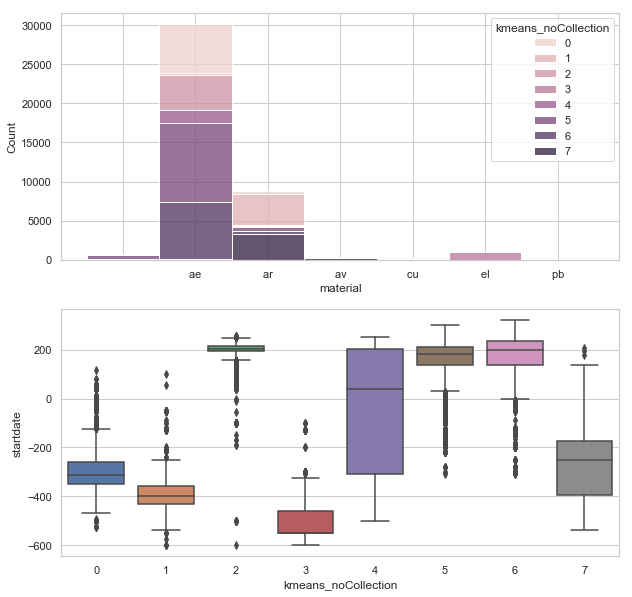

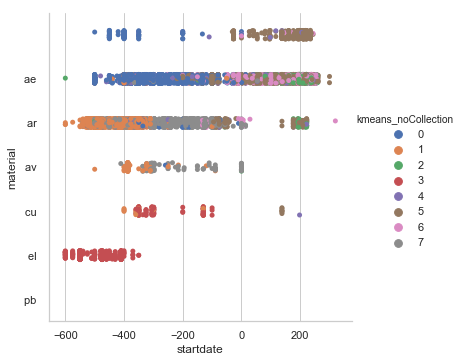

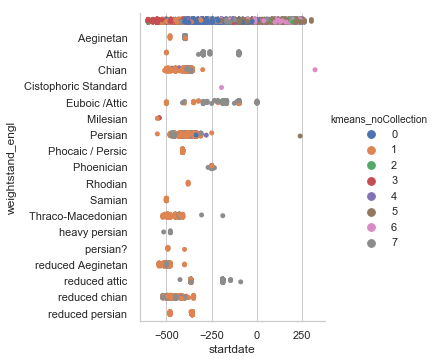

In [262]:
data_sub = data[features]#.loc[data[variant]==cluster_label]
data_sub[variant] = data[variant]

sns.set_theme(style="whitegrid")
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
sns.histplot(data=data_sub, x='material', hue=variant, multiple="stack", ax=axes[0])
sns.boxplot(x=variant, y='startdate', data=data_sub, ax=axes[1]) #group by 1 cat var
sns.catplot(data=data_sub, x="startdate", y="material", hue=variant)
sns.catplot(data=data_sub, x="startdate", y="weightstand_engl", hue=variant)





In [ ]:


#f.tight_layout()
    #ax = sns.catplot(x=var, y=label, data=data)

#TODO: x=startdate, y=materials, colours = clusters

#for var in cat_var:
 #   sns.set_theme(style="whitegrid")
  #  ax = sns.catplot(x=var, y=label, data=data_cl)

#ax = sns.boxplot(data=data, orient="h", palette="Set2") #all numeric values
#data_agg = data.groupby(f"labels_{algo}").agg(["mean", "count"])
#ax = sns.boxplot(x="startdate", y="mint", hue="material", data=data_cl, palette="Set3") #nest by 2 cat var
#ax = sns.boxplot(data=data_cl, orient="h", palette="Set2")
#print(data_cl.loc[data_cl['labels_kmeans']==1])
#data_cl.plot(x =data_cl['axis'].loc[data_cl['labels_kmeans']==1], y=data_cl['axis'].loc[data_cl['labels_kmeans']==1], kind = 'scatter')
#plt.show()
